In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Drop irrelevant columns
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df.dropna(inplace=True)

df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_952\3703190295.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [5]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Feature matrix and target
X = df.drop('survived', axis=1)
y = df['survived']

df.head()

,survived,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,True,False,True
1,1,1,38.0,71.2833,False,False,False
2,1,3,26.0,7.9250,False,False,True
3,1,1,35.0,53.1000,False,False,True
4,0,3,35.0,8.0500,True,False,True


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8090
Confusion Matrix:
[[94 15]
 [19 50]]


<Axes: >

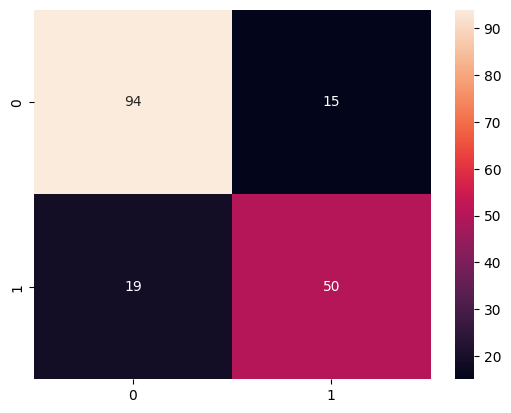

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

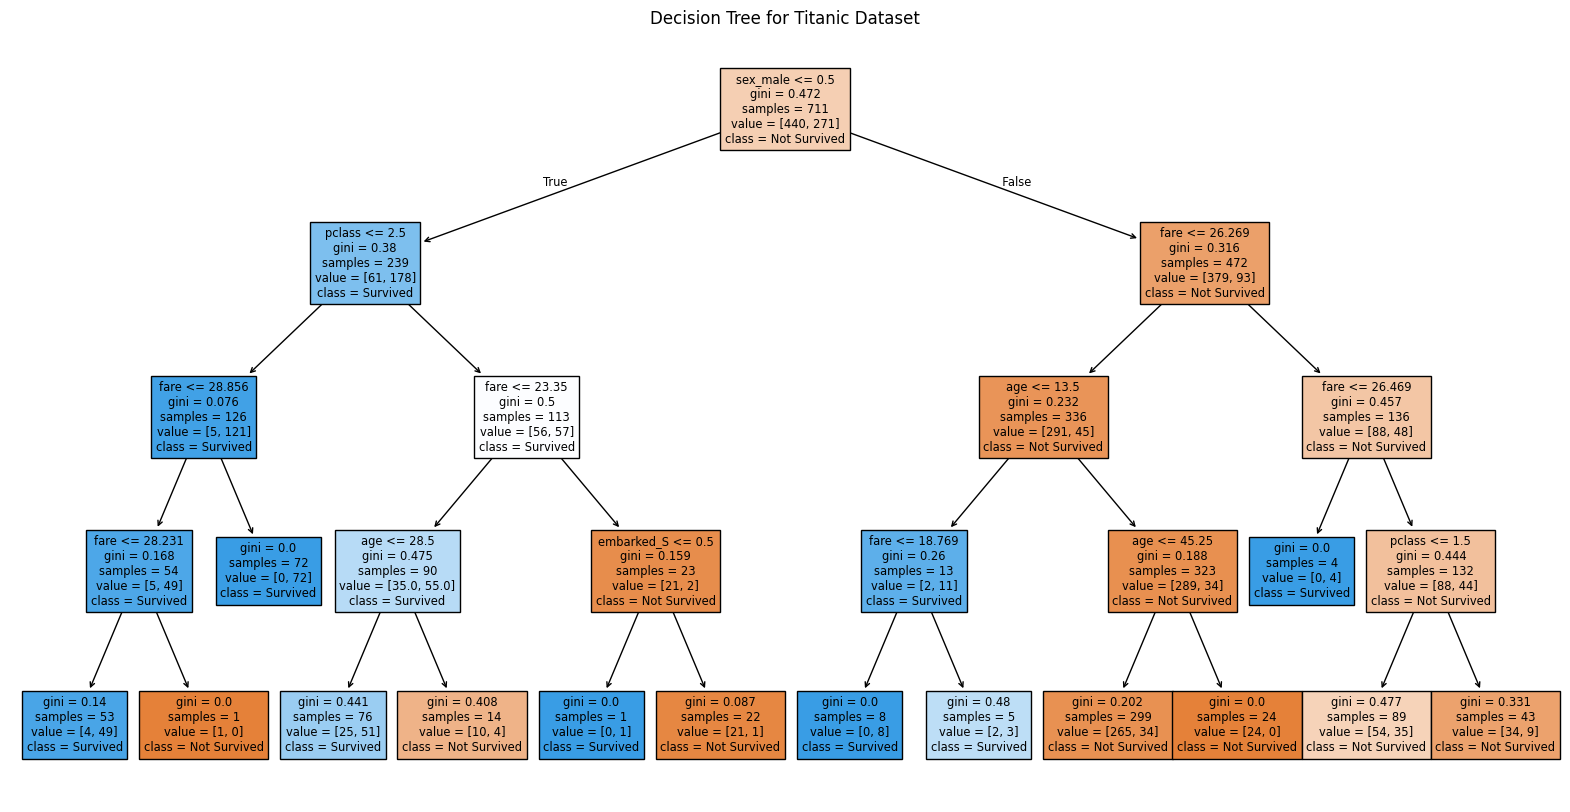

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()